In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
from pathlib import Path

In [2]:
path = r"C:\Users\transaction_date"
path = Path(path)


data = Path(path) / 'history_dummysample.csv'
df = pd.read_csv(data, delimiter = ',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200167 entries, 0 to 200166
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   account_id     200167 non-null  object
 1   date_of_birth  200167 non-null  object
 2   txn_ts         200167 non-null  object
 3   txn_amount     200167 non-null  int64 
 4   txn_type_code  200167 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.6+ MB


In [4]:
df.head()

,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code
0,ID000001,2000-01-12,2021-01-01 11:52:00,-42000,2
1,ID000001,2000-01-12,2021-01-01 13:01:00,-148000,2
2,ID000001,2000-01-12,2021-01-02 14:41:00,-1092000,1
3,ID000001,2000-01-12,2021-01-04 13:55:00,-197000,1
4,ID000001,2000-01-12,2021-01-04 14:50:00,-162000,1


In [5]:
#Check whether data has any null data
df.isna().sum()

account_id       0
date_of_birth    0
txn_ts           0
txn_amount       0
txn_type_code    0
dtype: int64

In [6]:
df['account_id'].nunique()
#6847 accounts

6847

In [7]:
pd.to_datetime(df.txn_ts).dt.date

0         2021-01-01
1         2021-01-01
2         2021-01-02
3         2021-01-04
4         2021-01-04
             ...    
200162    2021-03-31
200163    2021-03-31
200164    2021-03-31
200165    2021-03-31
200166    2021-03-31
Name: txn_ts, Length: 200167, dtype: object

In [8]:
df['txn_ts'] = pd.to_datetime(df['txn_ts'])
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['txn_year'] = df['txn_ts'].dt.year
df['txn_date'] = df['txn_ts'].dt.date
df['txn_month'] = df['txn_ts'].dt.month
df['txn_time'] = df['txn_ts'].dt.time
df['birth_year'] = df['date_of_birth'].dt.year

In [9]:
#Add column to calculate customer_age:
df['cus_age'] = df['txn_year'] - df['birth_year']

In [10]:
df_birth= df[['account_id','birth_year','cus_age']]
df_birth.drop_duplicates(keep='first', inplace=True)

C:\Users\nttxu\AppData\Local\Temp\ipykernel_17456\69950862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_birth.drop_duplicates(keep='first', inplace=True)


In [11]:
df_birth

,account_id,birth_year,cus_age
0,ID000001,2000,21
112,ID000002,2001,20
234,ID000003,2003,18
237,ID000004,2000,21
239,ID000005,2000,21
...,...,...,...
199447,ID006843,1998,23
199449,ID006844,2002,19
199452,ID006845,2000,21
199455,ID006846,1988,33


In [12]:
print(df_birth['birth_year'].min())
print(df_birth['birth_year'].max())

1943
2004


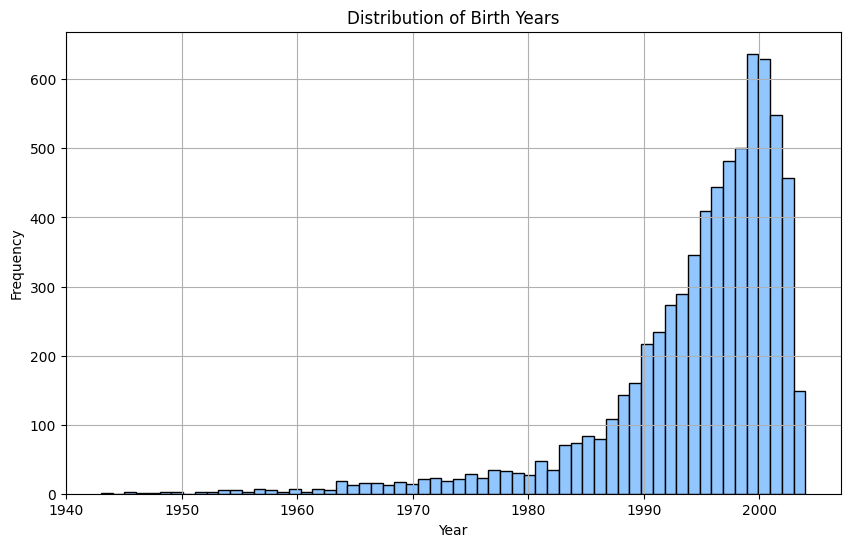

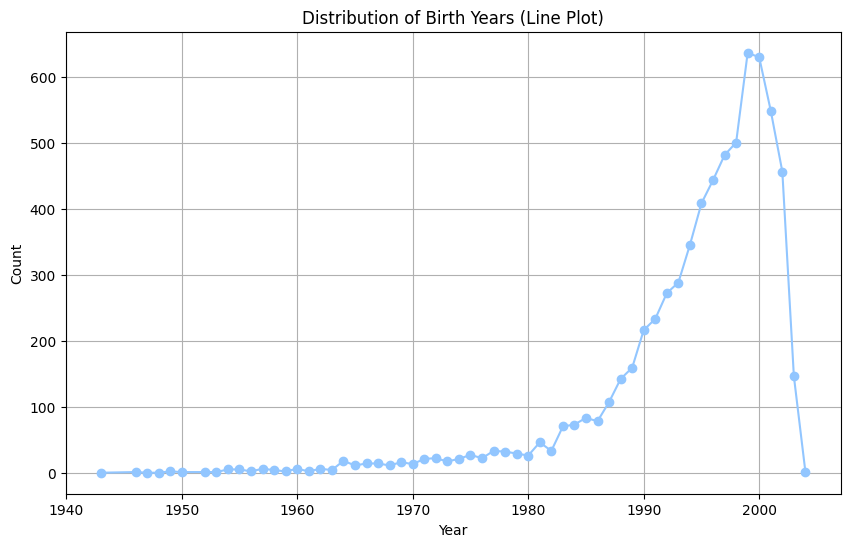

In [13]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_birth['birth_year'], bins=60, edgecolor='black')
plt.title('Distribution of Birth Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot line plot
plt.figure(figsize=(10, 6))
birth_year_counts = df_birth['birth_year'].value_counts().sort_index()
birth_year_counts.plot(kind='line', marker='o')
plt.title('Distribution of Birth Years (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

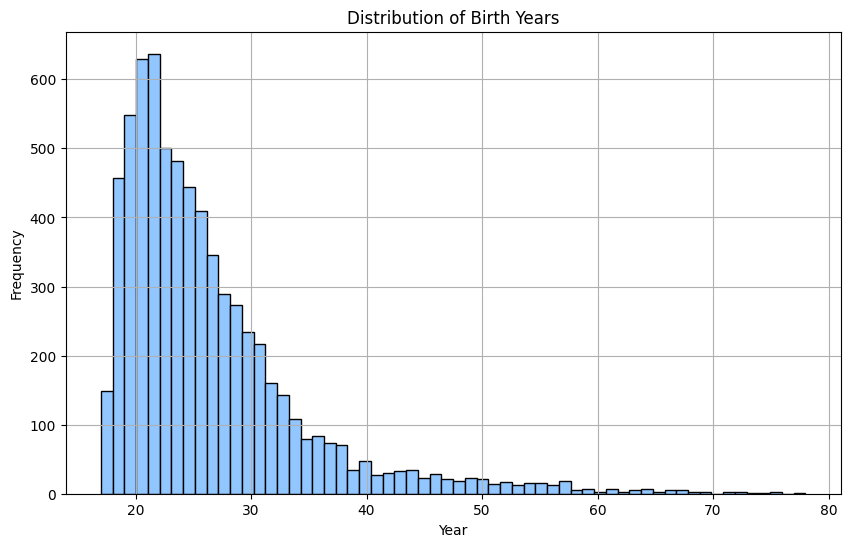

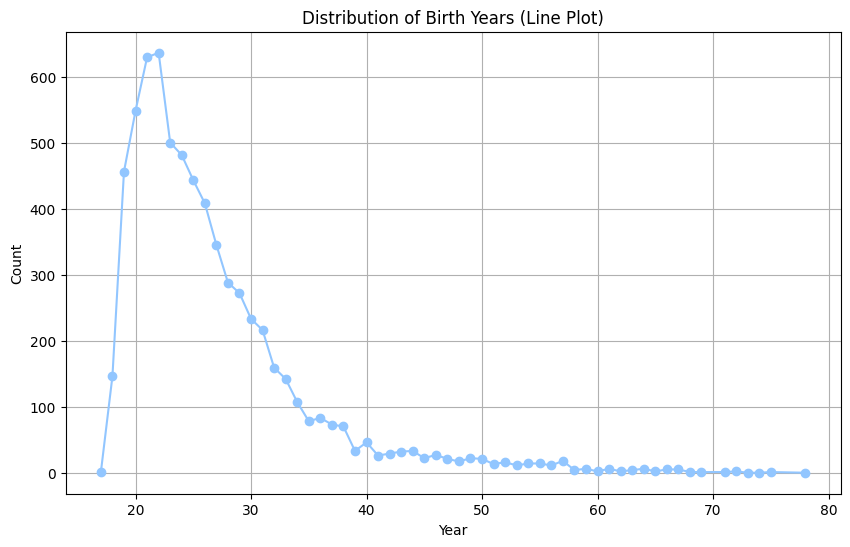

In [14]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_birth['cus_age'], bins=60,  edgecolor='black')
plt.title('Distribution of Birth Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot line plot
plt.figure(figsize=(10, 6))
birth_year_counts = df_birth['cus_age'].value_counts().sort_index()
birth_year_counts.plot(kind='line', marker='o')
plt.title('Distribution of Birth Years (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [15]:
proportion = df_birth['cus_age'].value_counts(normalize=True) * 100
proportion = proportion.sort_index()
proportion

cus_age
17    0.029210
18    2.146926
19    6.674456
20    8.018110
21    9.201110
22    9.303345
23    7.317073
24    7.039579
25    6.484592
26    5.973419
27    5.053308
28    4.220827
29    3.987148
30    3.417555
31    3.169271
32    2.336790
33    2.088506
34    1.577333
35    1.153790
36    1.226815
37    1.080765
38    1.036950
39    0.496568
40    0.686432
41    0.394333
42    0.438148
43    0.481963
44    0.496568
45    0.335914
46    0.408938
47    0.321309
48    0.262889
49    0.335914
50    0.321309
51    0.204469
52    0.248284
53    0.175259
54    0.219074
55    0.219074
56    0.175259
57    0.277494
58    0.073025
59    0.102235
60    0.043815
61    0.102235
62    0.043815
63    0.073025
64    0.102235
65    0.043815
66    0.087630
67    0.087630
68    0.029210
69    0.029210
71    0.029210
72    0.043815
73    0.014605
74    0.014605
75    0.029210
78    0.014605
Name: proportion, dtype: float64

In [16]:

age_ranges = {
    '17 - 30': (17, 30),
    '31 - 40': (31, 40),
    '41 - 50': (41, 50),
    '50+': (51, float('inf'))
}

age_range_percentages = {}
for range_name, (lower, upper) in age_ranges.items():
    range_percentages = proportion[(proportion.index >= lower) & (proportion.index <= upper)]
    age_range_percentages[range_name] = range_percentages.sum()

print("Age Range\t\tSum of Percentages")
print("----------------------------------")
for range_name, percentage_sum in age_range_percentages.items():
    print(f"{range_name}\t\t\t{percentage_sum:.2f}%")


Age Range		Sum of Percentages
----------------------------------
17 - 30			78.87%
31 - 40			14.85%
41 - 50			3.80%
50+			2.48%


In [17]:
!pip install plotly

import plotly.express as px

fig = px.box(df_birth, y='cus_age', title='Boxplot of Customer Age',height=600, width=800)
fig.show()



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


Insight: Customer Age Distribution:
- Our customers range in age from those born between 1943 and 2004.
- The largest segment of our customer base belongs to Generation Z, born primarily between 1995 and 2000.
- Interestingly, customers aged 17 to 30 make up the majority (78.87%) of our total customer base. 
This age range was determined by calculating the difference between the behavior, transaction date, amount when using digital bank.

This data focuses on customer transactions that occurred between January 1st, 2021 and April 1st, 2021

In [18]:
print(df['txn_ts'].min())
print(df['txn_ts'].max())

2021-01-01 08:36:00
2021-04-01 00:31:00


Transaction Activity Fluctuated:
A peak in transaction volume occurring in early February, followed by a decrease in volume reaching a low point in mid-February

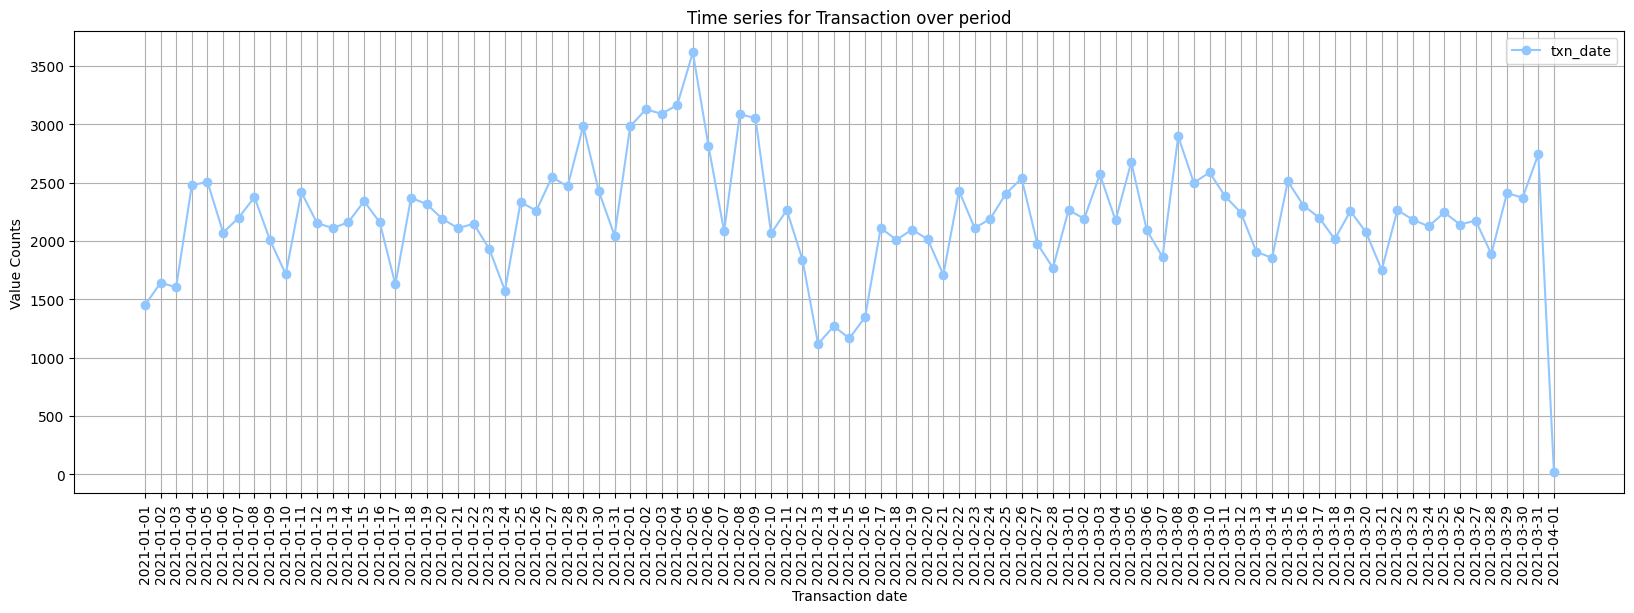

In [19]:
txn_date_counts = df['txn_date'].value_counts().sort_index()

plt.figure(figsize=(20, 6))
plt.plot(txn_date_counts.index.astype('str'), txn_date_counts.values, marker='o', linestyle='-', label='txn_date')
plt.title('Time series for Transaction over period')
plt.xlabel('Transaction date')
plt.ylabel('Value Counts')
plt.xticks(rotation=90)  
plt.grid(True)
plt.legend()
plt.show()



In [20]:
txn_date_counts.index

Index([2021-01-01, 2021-01-02, 2021-01-03, 2021-01-04, 2021-01-05, 2021-01-06,
       2021-01-07, 2021-01-08, 2021-01-09, 2021-01-10, 2021-01-11, 2021-01-12,
       2021-01-13, 2021-01-14, 2021-01-15, 2021-01-16, 2021-01-17, 2021-01-18,
       2021-01-19, 2021-01-20, 2021-01-21, 2021-01-22, 2021-01-23, 2021-01-24,
       2021-01-25, 2021-01-26, 2021-01-27, 2021-01-28, 2021-01-29, 2021-01-30,
       2021-01-31, 2021-02-01, 2021-02-02, 2021-02-03, 2021-02-04, 2021-02-05,
       2021-02-06, 2021-02-07, 2021-02-08, 2021-02-09, 2021-02-10, 2021-02-11,
       2021-02-12, 2021-02-13, 2021-02-14, 2021-02-15, 2021-02-16, 2021-02-17,
       2021-02-18, 2021-02-19, 2021-02-20, 2021-02-21, 2021-02-22, 2021-02-23,
       2021-02-24, 2021-02-25, 2021-02-26, 2021-02-27, 2021-02-28, 2021-03-01,
       2021-03-02, 2021-03-03, 2021-03-04, 2021-03-05, 2021-03-06, 2021-03-07,
       2021-03-08, 2021-03-09, 2021-03-10, 2021-03-11, 2021-03-12, 2021-03-13,
       2021-03-14, 2021-03-15, 2021-03-16, 2021-03-1

In [21]:
txn_time_counts = df['txn_time'].value_counts().sort_index()

C:\Users\nttxu\AppData\Local\Temp\ipykernel_17456\31789324.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



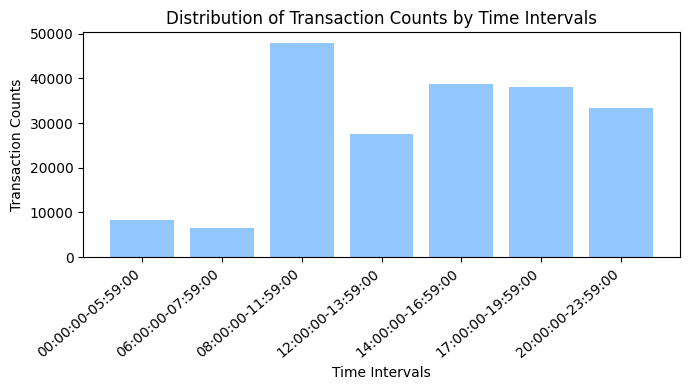

In [22]:
txn_time_counts.index = txn_time_counts.index.astype(str)

# Convert string index to datetime
txn_time_counts.index = pd.to_datetime(txn_time_counts.index, format='%H:%M:%S')

# Define the time intervals
time_intervals = ['00:00:00-05:59:00',
                    '06:00:00-07:59:00',
                    '08:00:00-11:59:00',
                    '12:00:00-13:59:00',
                    '14:00:00-16:59:00',
                    '17:00:00-19:59:00',
                    '20:00:00-23:59:00']

# Create bins for each time interval
bins =  

# Extract the hour component from the index
hour_component = txn_time_counts.index.hour

txn_time_groups = txn_time_counts.groupby(pd.cut(hour_component, bins=bins)).sum()

plt.figure(figsize=(7, 4))
plt.bar(time_intervals, txn_time_groups)
plt.title('Distribution of Transaction Counts by Time Intervals')
plt.xlabel('Time Intervals')
plt.ylabel('Transaction Counts')
plt.xticks(rotation=40, ha='right') 
plt.tight_layout()  
plt.show()


The transaction time would be grouped based on the individuals time (early morning, working time, rest time, afternoon, after work, evening time). There are varies from different time in a day. 
- Transaction volume is higher during business hours:between 8:00am and 16:59pm compared to evenings. This suggests that most transactions are likely tied to regular business hours.
- Potential lunch break dip: There seems to be a slight decrease in transaction counts around lunchtime (12:00 pm to 7:59 pm)
- Evening time: Transaction volume appears to be lower in the evenings after 12am.

In [23]:
df['txn_amount'].value_counts().reset_index()

,txn_amount,count
0,1000,4090
1,-10000,1686
2,-11000,984
3,-48000,975
4,-53000,967
...,...,...
25288,-29863000,1
25289,30128000,1
25290,-30902000,1
25291,34713000,1


Txn_amount presented the amount of transaction that can understand:
- Positive number: Saving transaction
- Negative number: Withdraw transaction

In [24]:
df['txn_amount_mil'] = df['txn_amount']/ 1000000

In [25]:
df['txn_amount_mil'].describe()

count    200167.000000
mean          0.435798
std          19.507072
min       -1358.349000
25%          -0.485000
50%          -0.055000
75%           0.140000
max        2073.547000
Name: txn_amount_mil, dtype: float64

Should definitely double check these two transactions, since they involve large amounts of saving money (over 2 billion VND) and include one being a withdrawal (more than 1 billion VND)

In [26]:
df[(df['txn_amount'] == -1358349000) | (df['txn_amount'] == 2073547000)]

,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code,txn_year,txn_date,txn_month,txn_time,birth_year,cus_age,txn_amount_mil
32704,ID001159,1995-10-11,2021-01-29 08:54:00,-1358349000,1,2021,2021-01-29,1,08:54:00,1995,26,-1358.349
143410,ID004939,1986-08-21,2021-03-23 16:55:00,2073547000,1,2021,2021-03-23,3,16:55:00,1986,35,2073.547


In [27]:
df['txn_date'] = pd.to_datetime(df['txn_date'])

# Create a new column 'day_of_week' to represent the day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['txn_date'].dt.dayofweek

# Map the day of the week to the name of the day
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = df['day_of_week'].apply(lambda x: day_names[x])

df.head()

,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code,txn_year,txn_date,txn_month,txn_time,birth_year,cus_age,txn_amount_mil,day_of_week,day_name
0,ID000001,2000-01-12,2021-01-01 11:52:00,-42000,2,2021,2021-01-01,1,11:52:00,2000,21,-0.042,4,Friday
1,ID000001,2000-01-12,2021-01-01 13:01:00,-148000,2,2021,2021-01-01,1,13:01:00,2000,21,-0.148,4,Friday
2,ID000001,2000-01-12,2021-01-02 14:41:00,-1092000,1,2021,2021-01-02,1,14:41:00,2000,21,-1.092,5,Saturday
3,ID000001,2000-01-12,2021-01-04 13:55:00,-197000,1,2021,2021-01-04,1,13:55:00,2000,21,-0.197,0,Monday
4,ID000001,2000-01-12,2021-01-04 14:50:00,-162000,1,2021,2021-01-04,1,14:50:00,2000,21,-0.162,0,Monday


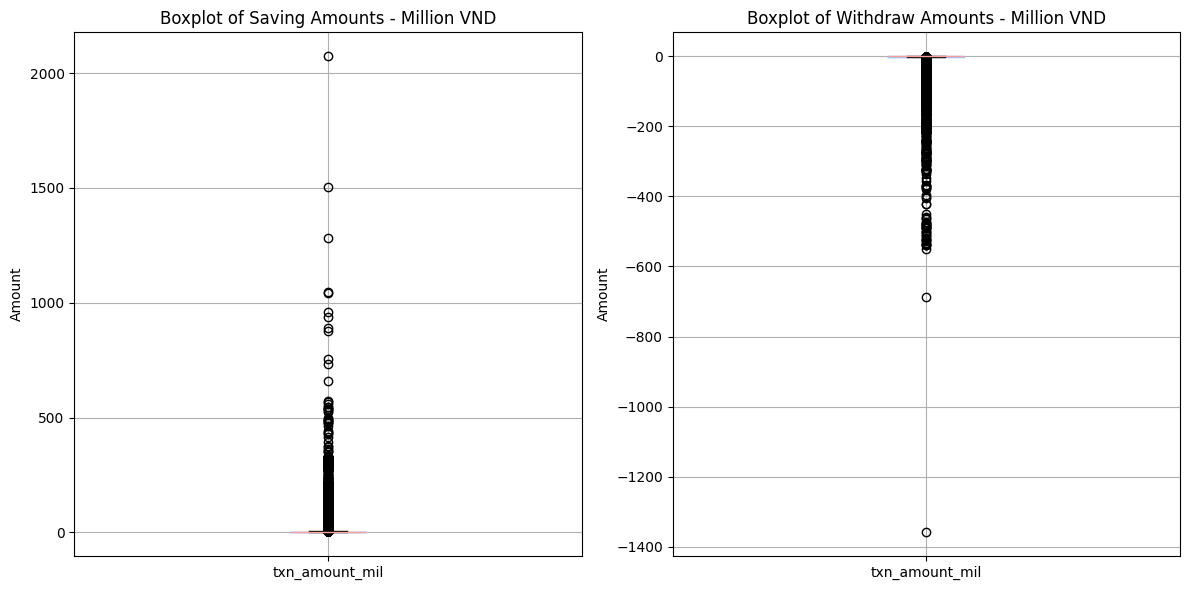

In [28]:
positive_txn = df[df['txn_amount_mil'] > 0]
negative_txn = df[df['txn_amount_mil'] < 0]

# Create subplots for positive and negative transaction amounts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot for positive transaction amounts
positive_txn.boxplot(column='txn_amount_mil', ax=axes[0])
axes[0].set_title('Boxplot of Saving Amounts - Million VND')
axes[0].set_ylabel('Amount')

# Boxplot for negative transaction amounts
negative_txn.boxplot(column='txn_amount_mil', ax=axes[1])
axes[1].set_title('Boxplot of Withdraw Amounts - Million VND')
axes[1].set_ylabel('Amount')

plt.tight_layout()
plt.show()

In [29]:
positive_txn.txn_amount_mil.describe()

count    72059.000000
mean         5.242690
std         25.483469
min          0.001000
25%          0.095000
50%          0.515000
75%          2.507500
max       2073.547000
Name: txn_amount_mil, dtype: float64

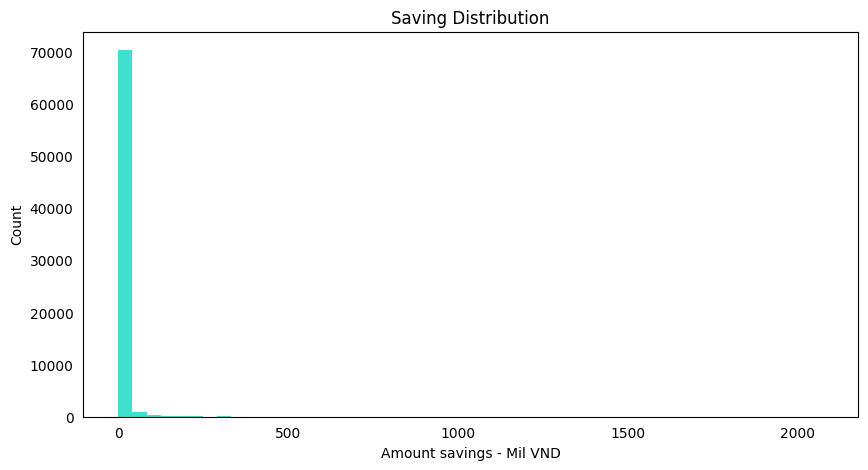

In [30]:
plt.figure(figsize=(10,5))
plt.title("Saving Distribution")
plt.xlabel("Amount savings - Mil VND")
plt.ylabel("Count")
plt.hist(positive_txn.txn_amount_mil,bins=50,color="turquoise")
plt.tick_params(bottom=False,left=False)
plt.ticklabel_format(style='plain')
plt.show()

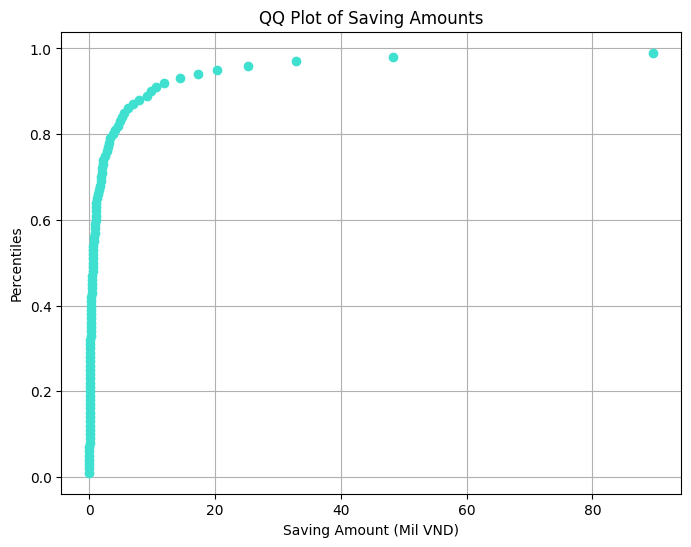

In [31]:
import scipy.stats as stats

percentiles = np.arange(0.01, 1, 0.01)  # Define percentiles from 1% to 99%
amount_percentiles = np.percentile(positive_txn['txn_amount_mil'], percentiles * 100)

# Create a QQ plot
plt.figure(figsize=(8, 6))
plt.plot(amount_percentiles,percentiles , marker='o', linestyle='',color="turquoise")
plt.title('QQ Plot of Saving Amounts')
plt.xlabel('Saving Amount (Mil VND)')
plt.ylabel('Percentiles')
plt.grid(True)
plt.show()


In [32]:
percentiles = np.arange(0.8, 1, 0.01)
percentiles

array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [33]:
pd.DataFrame({
    'percentiles' : percentiles,
    'amount' : np.percentile(positive_txn['txn_amount_mil'], percentiles * 100)
})

,percentiles,amount
0,0.80,3.75780
1,0.81,4.13400
2,0.82,4.55756
3,0.83,4.86400
4,0.84,5.18400
5,0.85,5.48700
6,0.86,6.16900
7,0.87,6.90846
8,0.88,7.89200
9,0.89,9.10000


Savings Transaction Analysis:

- Minimum Transaction Amount: The minimum transaction amount for savings deposits is 1,000 VND.
- Main Transaction Volume: The majority of savings deposits fall within the range of 1,000 VND to 6,200,000 VND

=> Main customers are Standard class with this amount of transaction.
- High-Value Transactions: A small number of transactions involve very large deposits exceeding 500 million VND and even reaching over 2 billion VND. It's recommended to further investigate the customer profiles associated with these high-value transactions.

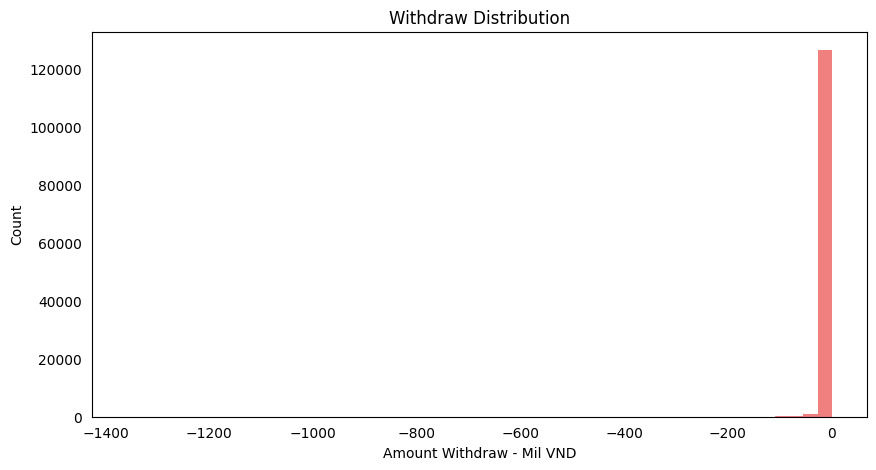

In [34]:
plt.figure(figsize=(10,5))
plt.title("Withdraw Distribution")
plt.xlabel("Amount Withdraw - Mil VND")
plt.ylabel("Count")
plt.hist(negative_txn.txn_amount_mil,bins=50,color="lightcoral")
plt.tick_params(bottom=False,left=False)
plt.ticklabel_format(style='plain')
plt.show()

In [35]:
print(negative_txn['txn_amount'].min())
print(negative_txn['txn_amount'].max())

-1358349000
-1000


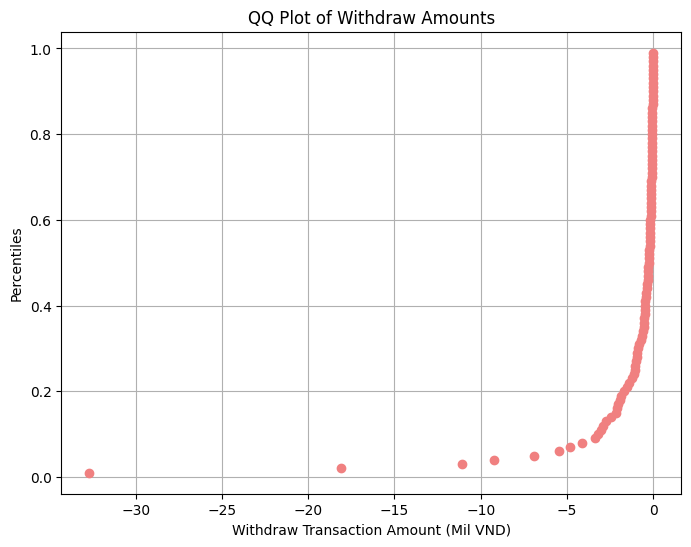

In [36]:
percentiles = np.arange(0.01, 1, 0.01)  # Define percentiles from 1% to 99%
amount_percentiles = np.percentile(negative_txn['txn_amount_mil'], percentiles * 100)

# Create a QQ plot
plt.figure(figsize=(8, 6))
plt.plot(amount_percentiles,percentiles , marker='o', linestyle='',color="lightcoral")
plt.title('QQ Plot of Withdraw Amounts')
plt.xlabel('Withdraw Transaction Amount (Mil VND)')
plt.ylabel('Percentiles')
plt.grid(True)
plt.show()

In [37]:
percentiles= np.arange(0.07, 1, 0.01)
percentiles

array([0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17,
       0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28,
       0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39,
       0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ,
       0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61,
       0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72,
       0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83,
       0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94,
       0.95, 0.96, 0.97, 0.98, 0.99])

In [38]:
pd.DataFrame({
    'percentiles' : percentiles,
    'amount' : np.percentile(negative_txn['txn_amount_mil'], percentiles * 100)
})

,percentiles,amount
0,0.07,-4.82300
1,0.08,-4.12100
2,0.09,-3.37914
3,0.10,-3.17200
4,0.11,-3.03200
...,...,...
88,0.95,-0.01600
89,0.96,-0.01100
90,0.97,-0.01000
91,0.98,-0.00900


In [39]:
df[df['txn_amount'] == 1000]['txn_type_code'].value_counts()

txn_type_code
6    2688
1    1202
7      83
3      77
4      40
Name: count, dtype: int64

In [40]:
df[df['txn_amount'] == -1000]['txn_type_code'].value_counts()

txn_type_code
2    601
1    215
Name: count, dtype: int64

In [41]:
df[df['txn_type_code'] == 5]['txn_amount'].value_counts()

txn_amount
-30000     228
-29000     221
-28000     221
-31000     205
-32000     200
          ... 
-550000      1
-306000      1
-209000      1
-205000      1
-494000      1
Name: count, Length: 114, dtype: int64

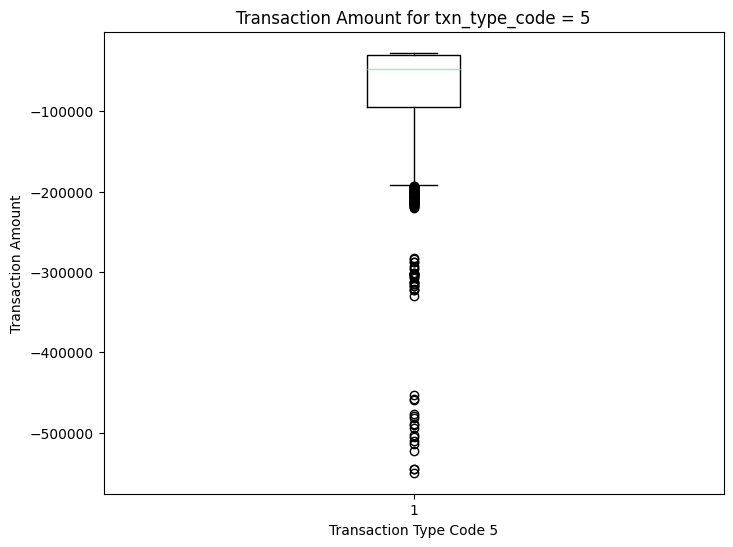

In [42]:
plt.figure(figsize=(8, 6))
plt.boxplot(df[df['txn_type_code'] == 5]['txn_amount'])
plt.xlabel('Transaction Type Code 5')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount for txn_type_code = 5')
plt.show()

Since the txn_type_code = 5: transaction amount in the range 30000 VND - 550000 VND 

=> Assume txn_type_code = 5: Phone Top-up

Therefore, txn_type_code = 2: Interbank Transfer

In [43]:
df[df['txn_type_code'] == 3]['txn_amount'].value_counts()

txn_amount
1000       77
2000       38
21000      31
10000      30
95000      26
           ..
2113000     1
6787000     1
5202000     1
1972000     1
1021000     1
Name: count, Length: 1987, dtype: int64

Withdraw Transaction Analysis:

- Minimum Transaction Amount: The minimum transaction amount for withdraw is 1,000 VND.

- Main Transaction Volume: The majority of savings deposits fall within the range of 1,000 VND to 3500000 VND

- High-Value Transactions: A small number of transactions involve very large deposits exceeding 500 million VND and even reaching over 1 billion VND. It's recommended to further investigate the customer profiles associated with these high-value transactions.

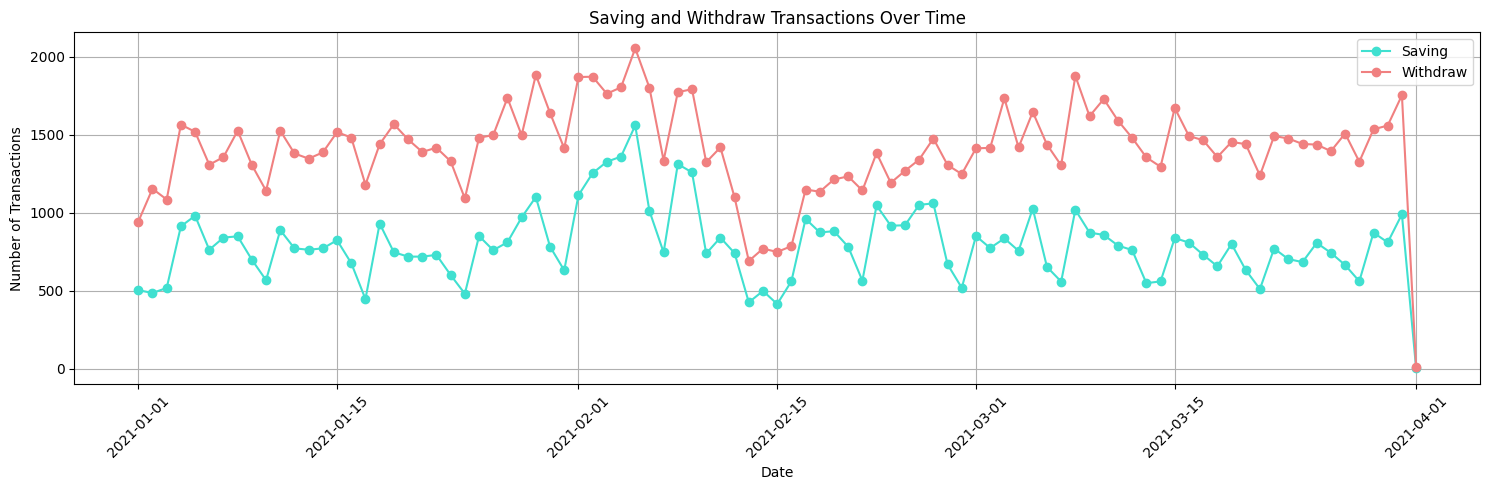

In [44]:
positive_txn_counts = positive_txn['txn_date'].value_counts().sort_index()
negative_txn_counts = negative_txn['txn_date'].value_counts().sort_index()

plt.figure(figsize=(15, 5))
plt.plot(positive_txn_counts.index, positive_txn_counts.values, label='Saving', marker='o',color="turquoise")
plt.plot(negative_txn_counts.index, negative_txn_counts.values, label='Withdraw', marker='o',color="lightcoral")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Saving and Withdraw Transactions Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


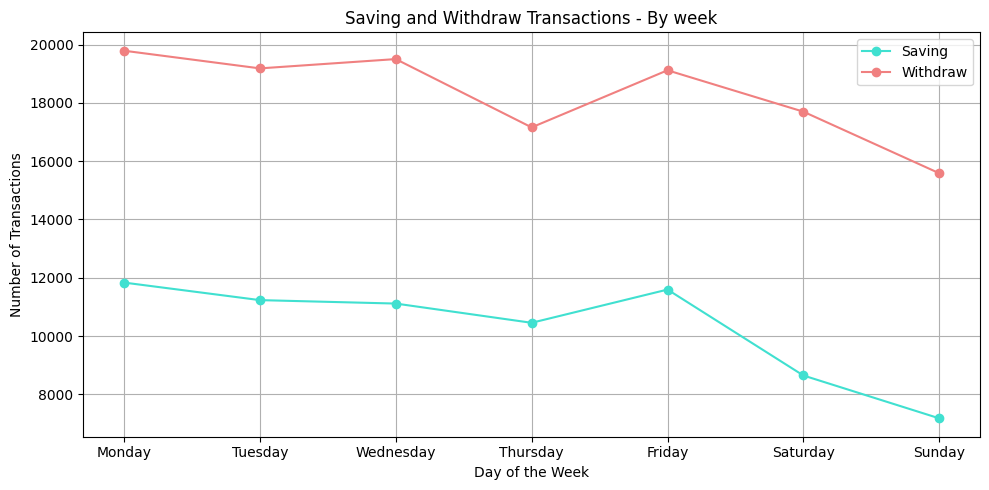

In [45]:
# Reorder days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
positive_txn_day_counts = positive_txn['day_name'].value_counts().reindex(day_order)
negative_txn_day_counts = negative_txn['day_name'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 5))
plt.plot(positive_txn_day_counts.index, positive_txn_day_counts.values, label='Saving', marker='o',color="turquoise")
plt.plot(negative_txn_day_counts.index, negative_txn_day_counts.values, label='Withdraw', marker='o',color="lightcoral")

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Saving and Withdraw Transactions - By week')

# Adjust x-axis ticks for days of the week
plt.xticks(range(7), day_order)

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


- Overall Trends: It appears that there are more withdraw transactions volumes than saving transactions volumes throughout the entire period. The saving and withdraw trends is quite consistent over the period. Assumption: COVID-19 pandemic in 2021
- The highest volumes occurred at the beginning of the week (Monday to Wednesday). These volumes then steadily declined throughout the week, reaching their lowest point on Thursday (mid-week) and continuing to drop over the weekend.



In [46]:
txn_type_counts=df['txn_type_code'].value_counts()
# Calculate the total number of transactions
total_transactions = txn_type_counts.sum()

# Calculate the percentage of each type code
percentage_per_type = (txn_type_counts / total_transactions) * 100

print(txn_type_counts)
print(percentage_per_type)

txn_type_code
1    119259
2     63360
3      4589
4      3438
7      3322
6      3191
5      3008
Name: count, dtype: int64
txn_type_code
1    59.579751
2    31.653569
3     2.292586
4     1.717566
7     1.659614
6     1.594169
5     1.502745
Name: count, dtype: float64


Type 1 accounts account for the majority of transactions (59.67%), followed by Type 2 accounts (31.65%). All other account types contribute a minimal percentage of the total transactions.

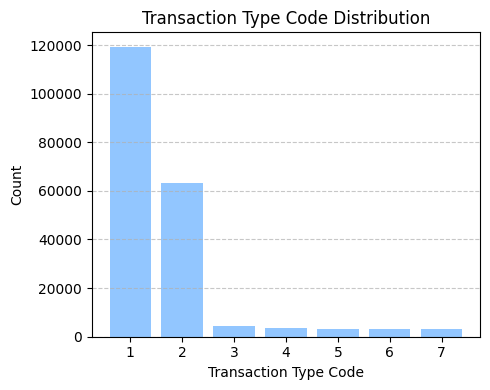

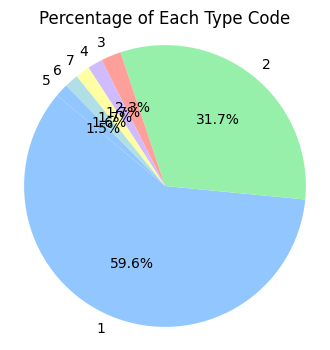

In [47]:
plt.figure(figsize=(5, 4))
plt.bar(txn_type_counts.index, txn_type_counts.values)

plt.xlabel('Transaction Type Code')
plt.ylabel('Count')
plt.title('Transaction Type Code Distribution')

plt.xticks(txn_type_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Draw the pie chart
labels = percentage_per_type.index
sizes = percentage_per_type.values

# colors = plt.cm.tab10.colors

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Percentage of Each Type Code')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


In [48]:
positive_txn['txn_type_code'].value_counts().reset_index()

,txn_type_code,count
0,1,57519
1,3,4589
2,4,3438
3,7,3322
4,6,3191


In [49]:
filtered_positive_txn = positive_txn[positive_txn['txn_type_code'] != 1]
grouped_counts = filtered_positive_txn.groupby('txn_type_code')['txn_amount'].value_counts().reset_index()
grouped_counts

,txn_type_code,txn_amount,count
0,3,1000,77
1,3,2000,38
2,3,21000,31
3,3,10000,30
4,3,95000,26
...,...,...,...
4694,7,327000,1
4695,7,57000,1
4696,7,41000,1
4697,7,30000,1


In [50]:
negative_txn['txn_type_code'].value_counts().reset_index()

,txn_type_code,count
0,2,63360
1,1,61660
2,5,3008


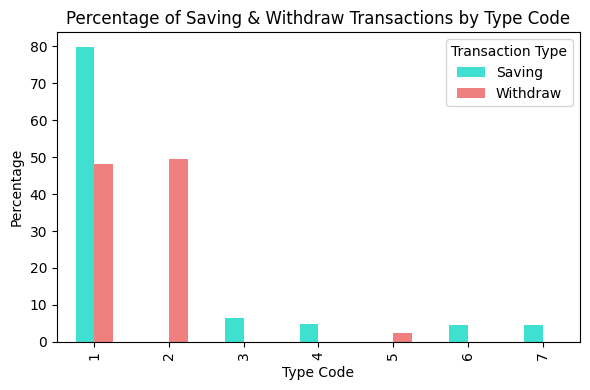

In [51]:
total_positive = positive_txn.shape[0]
total_negative = negative_txn.shape[0]

# Calculate the percentage of positive and negative transactions for each type code
positive_percentage_per_type = (positive_txn['txn_type_code'].value_counts() / total_positive) * 100
negative_percentage_per_type = (negative_txn['txn_type_code'].value_counts() / total_negative) * 100

# Combine the percentages into a single DataFrame for easier plotting
percentage_df = pd.DataFrame({'Saving': positive_percentage_per_type, 'Withdraw': negative_percentage_per_type})

# Define colors
colors = ['turquoise', 'lightcoral']
# Plot the bar chart
percentage_df.plot(kind='bar', figsize=(6, 4), color=colors)

# Add labels and title
plt.xlabel('Type Code')
plt.ylabel('Percentage')
plt.title('Percentage of Saving & Withdraw Transactions by Type Code')

# Add legend
plt.legend(title='Transaction Type')

# Show the plot
plt.tight_layout()
plt.show()


There are 7 different types of transactions in digital bank, in which 2 main group:
- Saving Transactions (Types 1, 3, 4, 6, and 7)
- Withdrawal Transactions (Types 1, 2, and 5)

It combines types 1 that appear in both categories 


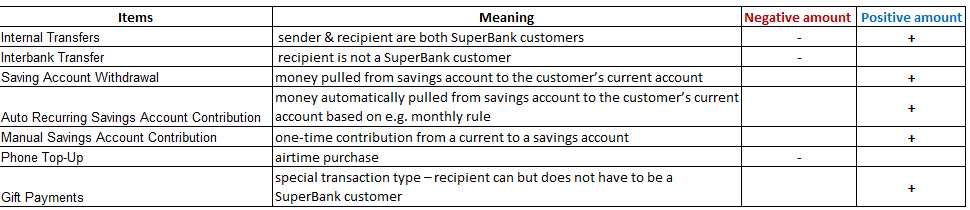

In [52]:
# Calculate average balance per user
average_balance_per_user = df.groupby('account_id')['txn_amount'].sum().mean()
print("Average Balance per User:", average_balance_per_user)

Average Balance per User: 12740220.242441945


The average amount of money held in accounts per user: 12,740,220 VND

In [53]:
#Calculate transactions per user
transactions_per_user = df['account_id'].value_counts().reset_index()
transactions_per_user

,account_id,count
0,ID005735,723
1,ID006847,709
2,ID001878,698
3,ID005260,483
4,ID001326,452
...,...,...
6842,ID005227,1
6843,ID005226,1
6844,ID005220,1
6845,ID005216,1


In [54]:
transactions_per_user.describe()

,count
count,6847.000000
mean,29.234263
std,47.101813
min,1.000000
25%,2.000000
50%,8.000000
75%,38.000000
max,723.000000


There are 1680 account IT that have total number of transactions > 38

In [55]:
transactions_per_user[transactions_per_user['count'] > 38]

,account_id,count
0,ID005735,723
1,ID006847,709
2,ID001878,698
3,ID005260,483
4,ID001326,452
...,...,...
1675,ID004285,39
1676,ID002407,39
1677,ID006414,39
1678,ID004289,39


In [56]:
# Group by account_id, txn_year, and txn_month, and count the transactions
transaction_frequency = df.groupby(['account_id', 'txn_month']).size().reset_index(name='txn_count')

# Filter transactions with frequency greater than 1
frequent_transactions = transaction_frequency[transaction_frequency['txn_count'] > 1]

# Calculate the frequency of frequent transactions
frequency_counts = frequent_transactions.groupby(['account_id']).size().reset_index(name='frequency_count')

# Display the result
print(frequency_counts)

     account_id  frequency_count
0      ID000001                3
1      ID000002                3
2      ID000003                1
3      ID000004                1
4      ID000005                1
...         ...              ...
5970   ID006843                1
5971   ID006844                1
5972   ID006845                1
5973   ID006846                1
5974   ID006847                3

[5975 rows x 2 columns]


In [57]:
for code in df.txn_type_code.unique():
    print(code, df[df['txn_type_code'] == code]['txn_amount_mil'].describe())

2 count    63360.000000
mean        -3.918835
std         19.272850
min       -549.496000
25%         -2.002000
50%         -0.500000
75%         -0.134000
max         -0.001000
Name: txn_amount_mil, dtype: float64
1 count    119259.000000
mean          2.628122
std          20.455143
min       -1358.349000
25%          -0.178000
50%          -0.010000
75%           0.575000
max        2073.547000
Name: txn_amount_mil, dtype: float64
5 count    3008.000000
mean       -0.065184
std         0.057207
min        -0.550000
25%        -0.095000
50%        -0.047000
75%        -0.030000
max        -0.027000
Name: txn_amount_mil, dtype: float64
3 count    4589.000000
mean        2.304939
std        10.023818
min         0.001000
25%         0.122000
50%         0.510000
75%         1.553000
max       327.187000
Name: txn_amount_mil, dtype: float64
6 count    3191.000000
mean        0.033642
std         0.409469
min         0.001000
25%         0.001000
50%         0.001000
75%         0.001000

In [58]:
# Calculate average transaction size
average_transaction_size = df['txn_amount'].mean()
print("Average Transaction Size:", average_transaction_size)


Average Transaction Size: 435797.54904654616


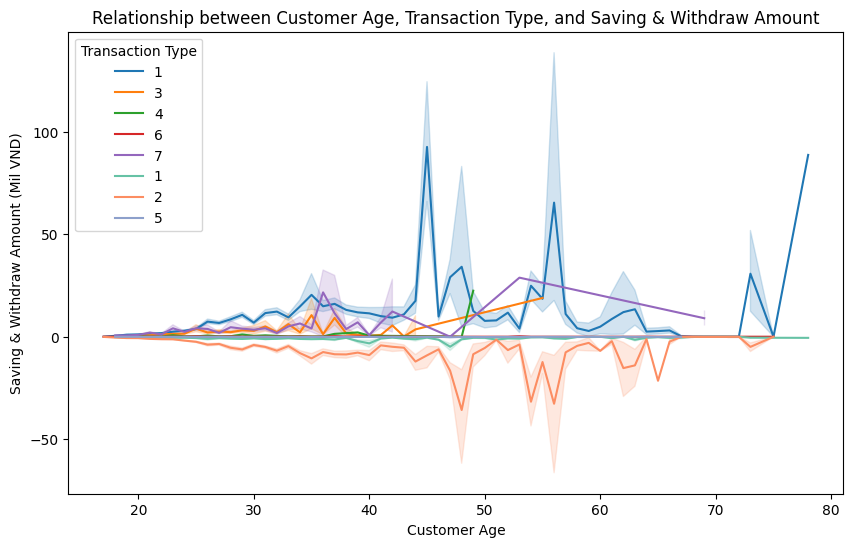

In [59]:
import seaborn as sns

# Line plot colored by txn_type_code
plt.figure(figsize=(10, 6))
sns.lineplot(data=positive_txn, x='cus_age', y='txn_amount_mil', hue='txn_type_code', palette='tab10')
sns.lineplot(data=negative_txn, x='cus_age', y='txn_amount_mil', hue='txn_type_code', palette='Set2')
plt.title('Relationship between Customer Age, Transaction Type, and Saving & Withdraw Amount')
plt.xlabel('Customer Age')
plt.ylabel('Saving & Withdraw Amount (Mil VND)')
plt.legend(title='Transaction Type')
plt.show()


# plt.figure(figsize=(10, 6))
# sns.lineplot(data=negative_txn, x='cus_age', y='txn_amount_mil', hue='txn_type_code', palette='Set1')
# plt.title('Relationship between Customer Age, Transaction Type, and Withdraw Amount')
# plt.xlabel('Customer Age')
# plt.ylabel('Withdraw Amount (Mil VND)')
# plt.legend(title='Transaction Type')
# plt.show()


Customers between the ages of 44 and 55 tend to have the highest total amounts saved and withdrawn.

Based on the analysis, here are the type_code and meaning of each transaction:
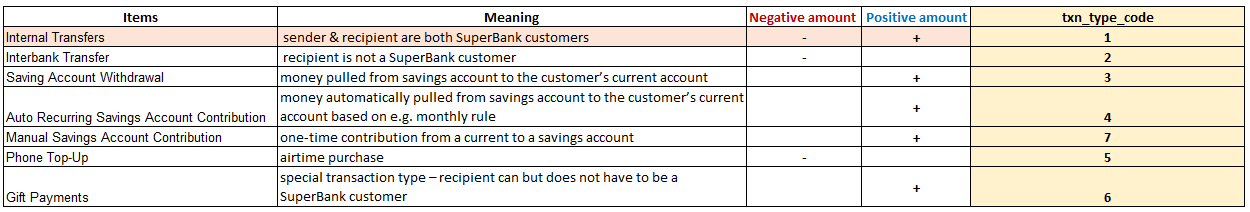